In [264]:
import sklearn
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [265]:
# Loading and cleaning the data
ghana_data = pd.read_csv('ghana_census_data.csv')
ghana_data.sample(5)

,year,population
30,1990,14773277
47,2007,22963946
16,1976,10199165
57,2017,29121471
33,1993,16106765


In [266]:
ghana_data = ghana_data.dropna()
ghana_data.shape

(60, 2)

In [267]:
ghana_data.head(10)

,year,population
0,1960,6635230
1,1961,6848295
2,1962,7071971
3,1963,7300116
4,1964,7524472
5,1965,7739473
6,1966,7941412
7,1967,8132803
8,1968,8321770
9,1969,8520015


In [268]:
ghana_data.describe()

,year,population
count,60.000000,6.000000e+01
mean,1989.500000,1.600337e+07
std,17.464249,7.074402e+06
min,1960.000000,6.635230e+06
25%,1974.750000,9.926736e+06
50%,1989.500000,1.456334e+07
75%,2004.250000,2.140790e+07
max,2019.000000,3.041786e+07


Text(0, 0.5, 'Population')

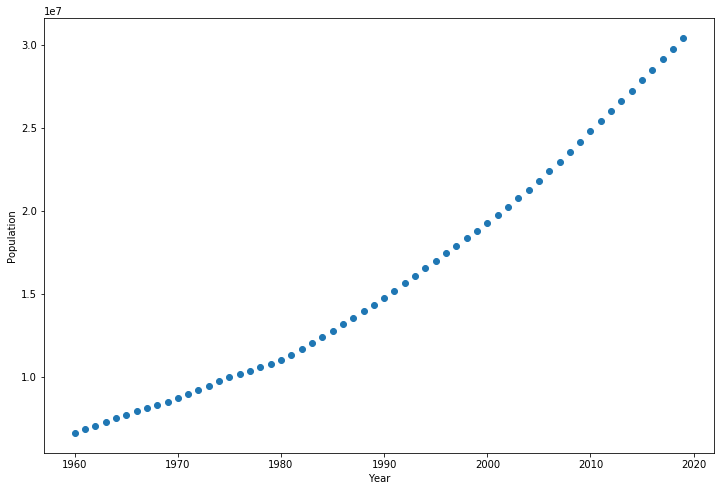

In [269]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(ghana_data['year'], ghana_data['population'])
plt.xlabel("Year")
plt.ylabel("Population")

In [270]:
ghana_data_corr = ghana_data.corr()
ghana_data_corr

,year,population
year,1.000000,0.983448
population,0.983448,1.000000


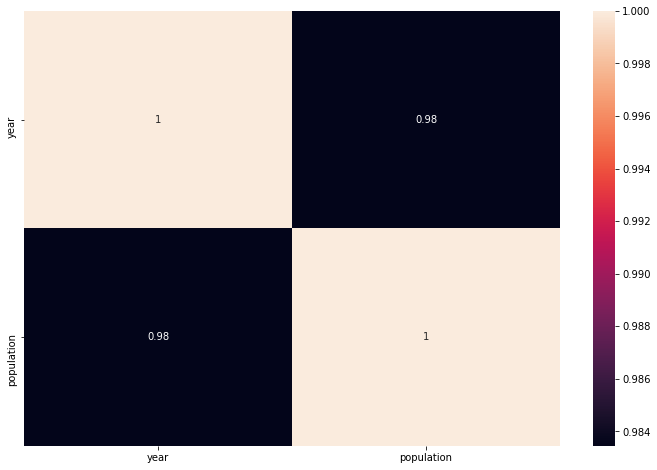

In [271]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(ghana_data_corr, annot=True)

In [272]:
X = ghana_data.drop('population', axis=1)
Y = ghana_data['population']

In [273]:
X.columns

Index(['year'], dtype='object')

In [274]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [275]:
x_train.shape, x_test.shape

((48, 1), (12, 1))

In [276]:
y_train.shape, y_test.shape

((48,), (12,))

In [277]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
print("Training_score : ", linear_model.score(x_train, y_train))

Training_score :  0.9668802635375237


In [279]:
predictors = x_train.columns
predictors

Index(['year'], dtype='object')

In [280]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

year    400346.407515
dtype: float64


In [281]:
y_pred = linear_model.predict(x_test)

In [282]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual

,predicted,actual
48,2.345542e+07,23563825
52,2.505680e+07,25996449
35,1.825092e+07,17014057
25,1.424745e+07,12783613
36,1.865126e+07,17462496
34,1.785057e+07,16561674
47,2.305507e+07,22963946
37,1.905161e+07,17908985
38,1.945195e+07,18357156
3,5.439830e+06,7300116


In [283]:
from sklearn.metrics import r2_score
print('Testing_score : ', r2_score(y_test, y_pred))

Testing_score :  0.9638983030268288


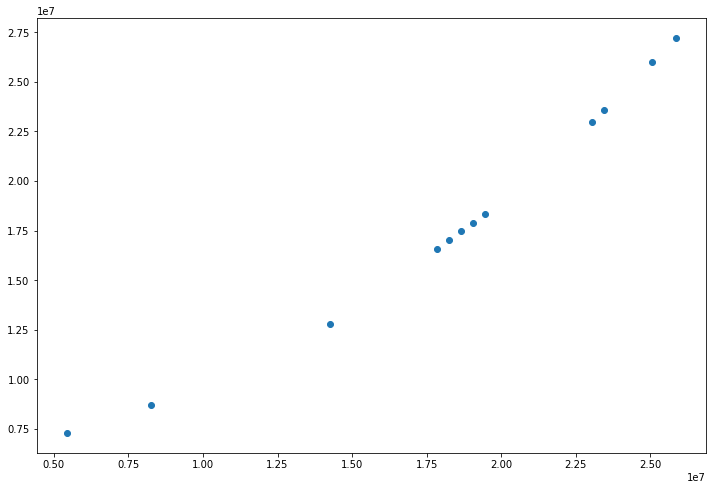

In [284]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_pred, y_test)
plt.show()

In [285]:
df_pred_actual_sample = df_pred_actual.sample(12)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [286]:
df_pred_actual_sample.head()

,index,predicted,actual
0,3,5.439830e+06,7300116
1,38,1.945195e+07,18357156
2,37,1.905161e+07,17908985
3,10,8.242255e+06,8735495
4,54,2.585750e+07,27224472


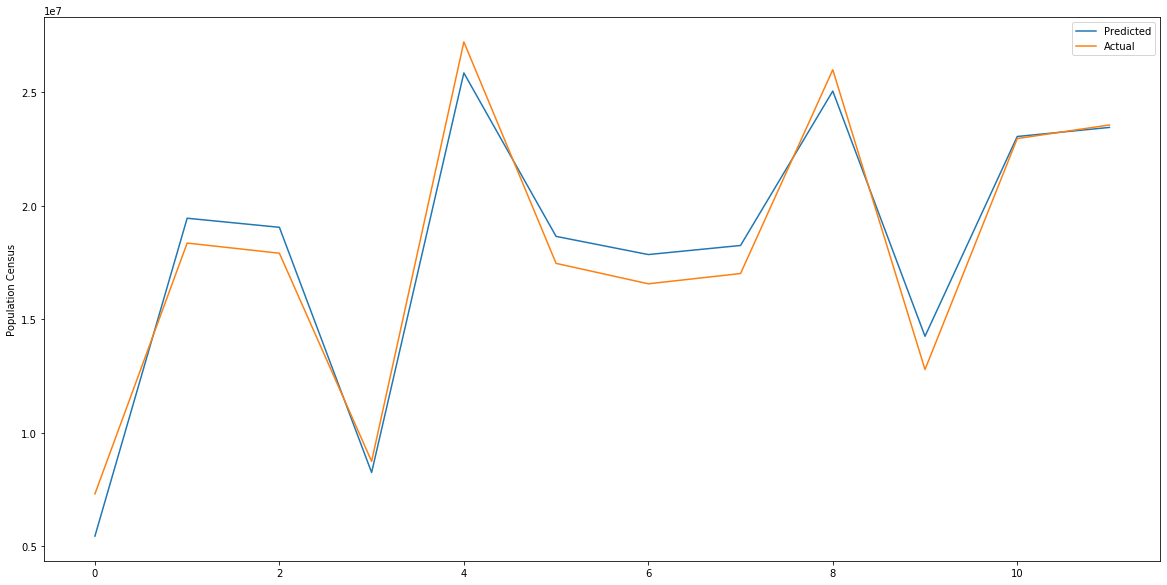

In [287]:
plt.figure(figsize=(20, 10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('Population Census')

plt.legend()
plt.show()

In [288]:
linear_model.predict([[1969]])

array([7841908.82278442])

2002

In [ ]:
[array([2002])]